In [1]:
from sklearn.datasets import fetch_openml

import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
import pandas as pd
import pathlib
import PIL
import cv2
import glob

In [3]:
path_dir = r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train'
data_dir = pathlib.Path(path_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

14034


In [5]:
buildings = list(data_dir.glob('buildings/*'))

In [6]:
buildings

[WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/0.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10006.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/1001.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10014.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10018.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10029.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10032.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10056.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/1009.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10113.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/1012.jpg'),
 WindowsPath('C:/Users/rahul/Desktop/EE258/Project/seg_train/buildings/10126.jpg'),

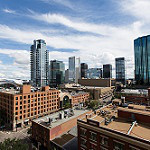

In [59]:
PIL.Image.open(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/buildings/1569.jpg')

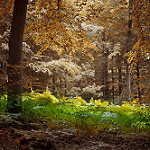

In [60]:
PIL.Image.open(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/forest/20006.jpg')

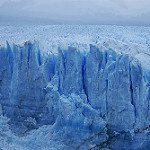

In [61]:
PIL.Image.open(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/glacier/190.jpg')

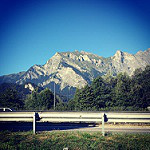

In [62]:
PIL.Image.open(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/mountain/364.jpg')

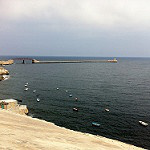

In [63]:
PIL.Image.open(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/sea/326.jpg')

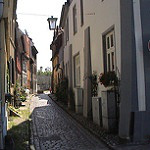

In [64]:
PIL.Image.open(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/street/484.jpg')

In [8]:
im = cv2.imread(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/buildings/10006.jpg')

In [9]:
print(type(im))
print(im.shape)
print(type(im.shape))

<class 'numpy.ndarray'>
(150, 150, 3)
<class 'tuple'>


In [10]:
buildings = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/buildings/*.*')
forest = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/forest/*.*')
glacier = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/glacier/*.*')
mountain = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/mountain/*.*')
sea = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/sea/*.*')
street = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_train/seg_train/street/*.*')

In [11]:
data = []
labels = []

In [12]:
for i in buildings:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels.append(0)
for i in forest:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels.append(1)
for i in glacier:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels.append(2)
for i in mountain:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels.append(3)
for i in sea:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels.append(4)
for i in street:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels.append(5)

In [13]:
data = np.array(data)
labels = np.array(labels)

In [14]:
images_train, counts_train = np.unique(labels, return_counts = True)

distribution_train = dict(zip(images_train, counts_train))
print(distribution_train )

{0: 2191, 1: 2271, 2: 2404, 3: 2512, 4: 2274, 5: 2382}


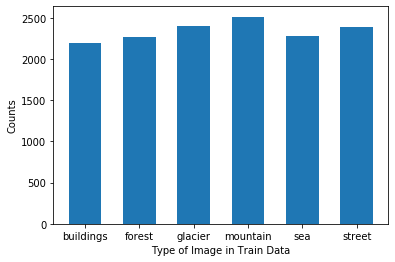

In [15]:
xticks = ['buildings','forest','glacier','mountain','sea','street']
plt.bar(xticks,distribution_train.values(),width =0.6)
plt.xlabel('Type of Image in Train Data')
plt.ylabel('Counts')
plt.show()

In [16]:
buildings1 = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_test/seg_test/buildings/*.*')
forest1 = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_test/seg_test/forest/*.*')
glacier1 = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_test/seg_test/glacier/*.*')
mountain1 = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_test/seg_test/mountain/*.*')
sea1 = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_test/seg_test/sea/*.*')
street1 = glob.glob(r'/Users/moniruzzamankhan/Downloads/archive/seg_test/seg_test/street/*.*')

In [17]:
data1 = []
labels1 = []

In [18]:
for i in buildings1:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data1.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels1.append(0)
for i in forest1:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data1.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels1.append(1)
for i in glacier1:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data1.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels1.append(2)
for i in mountain1:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data1.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels1.append(3)
for i in sea1:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data1.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels1.append(4)
for i in street1:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data1.append(cv2.resize(image, (100,100), interpolation=cv2.INTER_CUBIC))
    labels1.append(5)

In [19]:
data1 = np.array(data1)
labels1 = np.array(labels1)

In [20]:
images_test, counts_test = np.unique(labels1, return_counts = True)

distribution_test = dict(zip(images_test, counts_test))
print(distribution_test )

{0: 437, 1: 474, 2: 553, 3: 525, 4: 510, 5: 501}


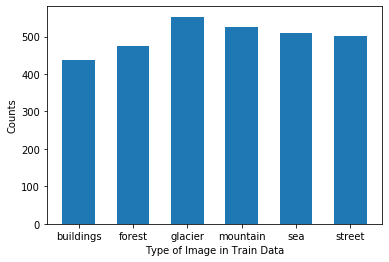

In [21]:
xticks = ['buildings','forest','glacier','mountain','sea','street']
plt.bar(xticks,distribution_test.values(),width =0.6)
plt.xlabel('Type of Image in Train Data')
plt.ylabel('Counts')
plt.show()

In [22]:
X_train = data
y_train = labels
X_test = data1
y_test = labels1

In [23]:
X_train[1].shape

(100, 100, 3)

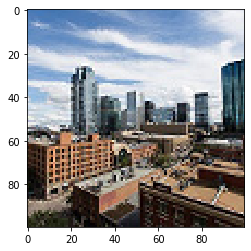

In [24]:
plt.imshow(X_train[1])

In [25]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 1/6, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(11695, 100, 100, 3) (2339, 100, 100, 3)
[2 0 0 ... 2 0 3] [0 5 5 ... 2 3 5]


In [26]:
import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 1.15.0
Keras Version: 2.2.4-tf


In [27]:
from tensorflow.keras.optimizers import SGD

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')

model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data =(X_val,y_val))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 11695 samples, validate on 2339 samples
Epoch 1/20
11695/11695 [==============================] - 977s 84ms/sample - loss: 1.5188 - acc: 0.4499 - val_loss: 1.3852 - val_acc: 0.4669
Epoch 2/20
11695/11695 [==============================] - 753s 64ms/sample - loss: 1.2379 - acc: 0.5271 - val_loss: 1.4633 - val_acc: 0.4049
Epoch 3/20
11695/11695 [==============================] - 676s 58ms/sample - loss: 1.1740 - acc: 0.5614 - val_loss: 1.1974 - val_acc: 0.5566
Epoch 4/20
11695/11695 [==============================] - 681s 58ms/sample - loss: 1.1352 - acc: 0.5779 - val_loss: 1.1888 - val_acc: 0.5631
Epoch 5/20
11695/11695 [==============================] - 679s 58ms/sample - loss: 1.1032 - acc: 0.5905 - val_loss: 1.3065 - val_acc: 0.4968
Epoch 6/20
11695/11695 [==============================] - 678s 58ms/sample - loss: 1.0791 - acc: 0.6017 - val_loss: 1.1499 - val_acc: 0.5665
Epoch 7/20
11695/11695 [

In [65]:
from tensorflow.keras.optimizers import SGD

model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(300, activation ="relu"))
model1.add(keras.layers.Dense(300, activation ="relu"))
model1.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model1.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#X_train = X_train.astype('float32')/255.0
#y_train = y_train.astype('uint')
#X_val = X_val.astype('float32')/255.0
#y_val = y_val.astype('uint')

history = model1.fit(X_train, y_train, batch_size=128, epochs=20, validation_data =(X_val,y_val))


Train on 11695 samples, validate on 2339 samples
Epoch 1/20
11695/11695 [==============================] - 16s 1ms/sample - loss: 1.5634 - acc: 0.3813 - val_loss: 1.5018 - val_acc: 0.4292
Epoch 2/20
11695/11695 [==============================] - 7s 563us/sample - loss: 1.3445 - acc: 0.4813 - val_loss: 1.5674 - val_acc: 0.4074
Epoch 3/20
11695/11695 [==============================] - 6s 553us/sample - loss: 1.2602 - acc: 0.5149 - val_loss: 1.3594 - val_acc: 0.4707
Epoch 4/20
11695/11695 [==============================] - 7s 583us/sample - loss: 1.2183 - acc: 0.5378 - val_loss: 1.2779 - val_acc: 0.4998
Epoch 5/20
11695/11695 [==============================] - 7s 580us/sample - loss: 1.1718 - acc: 0.5527 - val_loss: 1.3508 - val_acc: 0.4669
Epoch 6/20
11695/11695 [==============================] - 7s 579us/sample - loss: 1.1469 - acc: 0.5619 - val_loss: 1.2789 - val_acc: 0.4994
Epoch 7/20
11695/11695 [==============================] - 7s 581us/sample - loss: 1.1160 - acc: 0.5739 - val_los

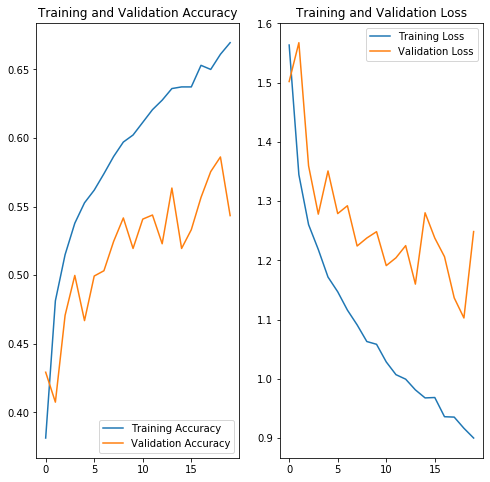

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(300, activation ="sigmoid"))
model2.add(keras.layers.Dense(300, activation ="sigmoid"))
model2.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model2.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#X_train = X_train.astype('float32')/255.0
#y_train = y_train.astype('uint')
#X_val = X_val.astype('float32')/255.0
#y_val = y_val.astype('uint')

history = model2.fit(X_train, y_train, batch_size=128, epochs=20, validation_data =(X_val,y_val))

Train on 11695 samples, validate on 2339 samples
Epoch 1/20
11695/11695 [==============================] - 8s 667us/sample - loss: 1.7444 - acc: 0.2936 - val_loss: 1.6948 - val_acc: 0.3835
Epoch 2/20
11695/11695 [==============================] - 7s 582us/sample - loss: 1.6588 - acc: 0.4213 - val_loss: 1.6407 - val_acc: 0.3955
Epoch 3/20
11695/11695 [==============================] - 7s 570us/sample - loss: 1.6032 - acc: 0.4454 - val_loss: 1.5962 - val_acc: 0.4245
Epoch 4/20
11695/11695 [==============================] - 7s 577us/sample - loss: 1.5538 - acc: 0.4649 - val_loss: 1.5480 - val_acc: 0.4421
Epoch 5/20
11695/11695 [==============================] - 6s 555us/sample - loss: 1.5085 - acc: 0.4723 - val_loss: 1.5108 - val_acc: 0.4540
Epoch 6/20
11695/11695 [==============================] - 6s 548us/sample - loss: 1.4682 - acc: 0.4799 - val_loss: 1.4756 - val_acc: 0.4634
Epoch 7/20
11695/11695 [==============================] - 6s 545us/sample - loss: 1.4344 - acc: 0.4855 - val_lo

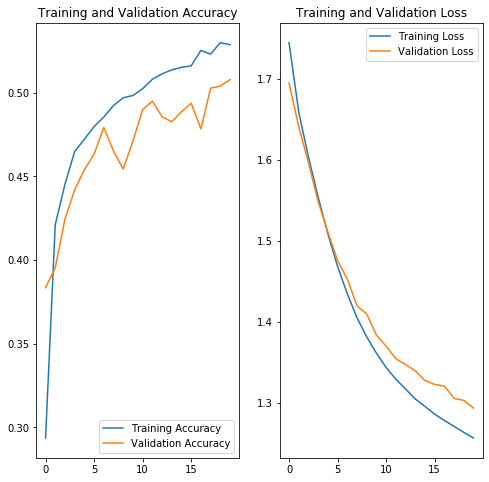

In [72]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(300, activation ="relu"))
model3.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model3.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#X_train = X_train.astype('float32')/255.0
#y_train = y_train.astype('uint')
#X_val = X_val.astype('float32')/255.0
#y_val = y_val.astype('uint')

history = model3.fit(X_train, y_train, batch_size=128, epochs=20, validation_data =(X_val,y_val))

Train on 11695 samples, validate on 2339 samples
Epoch 1/20
11695/11695 [==============================] - 7s 595us/sample - loss: 1.6701 - acc: 0.3771 - val_loss: 1.4557 - val_acc: 0.4096
Epoch 2/20
11695/11695 [==============================] - 7s 563us/sample - loss: 1.3559 - acc: 0.4757 - val_loss: 1.3936 - val_acc: 0.4647
Epoch 3/20
11695/11695 [==============================] - 7s 580us/sample - loss: 1.2842 - acc: 0.5094 - val_loss: 1.3116 - val_acc: 0.4951
Epoch 4/20
11695/11695 [==============================] - 6s 545us/sample - loss: 1.2468 - acc: 0.5217 - val_loss: 1.2913 - val_acc: 0.5079
Epoch 5/20
11695/11695 [==============================] - 6s 546us/sample - loss: 1.2138 - acc: 0.5376 - val_loss: 1.3714 - val_acc: 0.4741
Epoch 6/20
11695/11695 [==============================] - 6s 531us/sample - loss: 1.1733 - acc: 0.5498 - val_loss: 1.2364 - val_acc: 0.5165
Epoch 7/20
11695/11695 [==============================] - 7s 571us/sample - loss: 1.1515 - acc: 0.5622 - val_lo

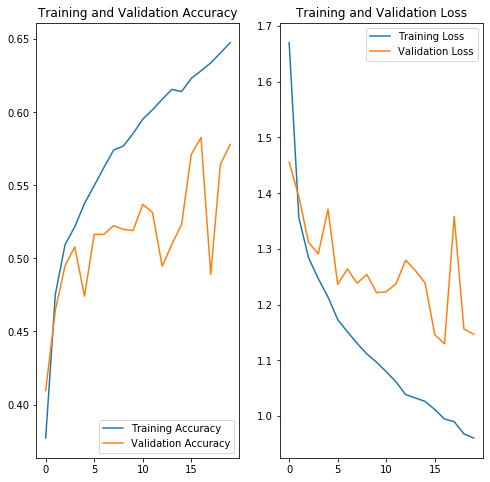

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(30, activation ="relu"))
model4.add(keras.layers.Dense(30, activation ="relu"))
model4.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model4.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#X_train = X_train.astype('float32')/255.0
#y_train = y_train.astype('uint')
#X_val = X_val.astype('float32')/255.0
#y_val = y_val.astype('uint')

history = model4.fit(X_train, y_train, batch_size=128, epochs=20, validation_data =(X_val,y_val))

Train on 11695 samples, validate on 2339 samples
Epoch 1/20
11695/11695 [==============================] - 3s 291us/sample - loss: 1.7566 - acc: 0.2222 - val_loss: 1.7031 - val_acc: 0.2646
Epoch 2/20
11695/11695 [==============================] - 3s 218us/sample - loss: 1.6010 - acc: 0.3490 - val_loss: 1.5141 - val_acc: 0.3929
Epoch 3/20
11695/11695 [==============================] - 3s 256us/sample - loss: 1.4605 - acc: 0.4316 - val_loss: 1.4215 - val_acc: 0.4395
Epoch 4/20
11695/11695 [==============================] - 3s 240us/sample - loss: 1.3621 - acc: 0.4781 - val_loss: 1.6028 - val_acc: 0.3792
Epoch 5/20
11695/11695 [==============================] - 3s 254us/sample - loss: 1.3145 - acc: 0.4900 - val_loss: 1.4424 - val_acc: 0.4711
Epoch 6/20
11695/11695 [==============================] - 3s 238us/sample - loss: 1.2813 - acc: 0.5070 - val_loss: 1.5689 - val_acc: 0.3655
Epoch 7/20
11695/11695 [==============================] - 3s 238us/sample - loss: 1.2426 - acc: 0.5236 - val_lo

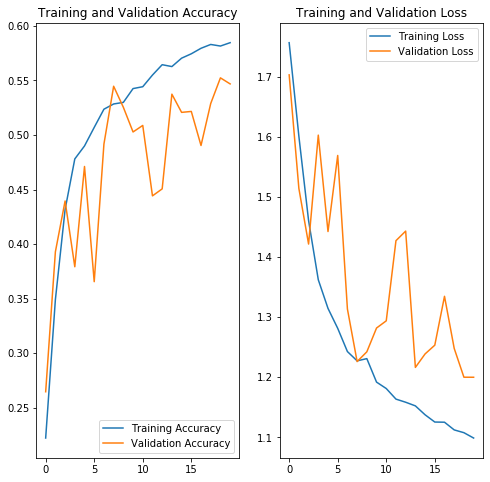

In [76]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [77]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(30, activation ="relu"))
model5.add(keras.layers.Dense(30, activation ="relu"))
model5.add(keras.layers.Dense(30, activation ="relu"))
model5.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model5.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#X_train = X_train.astype('float32')/255.0
#y_train = y_train.astype('uint')
#X_val = X_val.astype('float32')/255.0
#y_val = y_val.astype('uint')

history = model5.fit(X_train, y_train, batch_size=128, epochs=20, validation_data =(X_val,y_val))

Train on 11695 samples, validate on 2339 samples
Epoch 1/20
11695/11695 [==============================] - 4s 301us/sample - loss: 1.6886 - acc: 0.2602 - val_loss: 1.6724 - val_acc: 0.2702
Epoch 2/20
11695/11695 [==============================] - 3s 251us/sample - loss: 1.5523 - acc: 0.3692 - val_loss: 1.5030 - val_acc: 0.3968
Epoch 3/20
11695/11695 [==============================] - 3s 243us/sample - loss: 1.4484 - acc: 0.4497 - val_loss: 1.4943 - val_acc: 0.4104
Epoch 4/20
11695/11695 [==============================] - 3s 228us/sample - loss: 1.3733 - acc: 0.4839 - val_loss: 1.4462 - val_acc: 0.4134
Epoch 5/20
11695/11695 [==============================] - 3s 262us/sample - loss: 1.3347 - acc: 0.4949 - val_loss: 1.4055 - val_acc: 0.4566
Epoch 6/20
11695/11695 [==============================] - 3s 291us/sample - loss: 1.3044 - acc: 0.5030 - val_loss: 1.3163 - val_acc: 0.4912
Epoch 7/20
11695/11695 [==============================] - 3s 254us/sample - loss: 1.2767 - acc: 0.5167 - val_lo

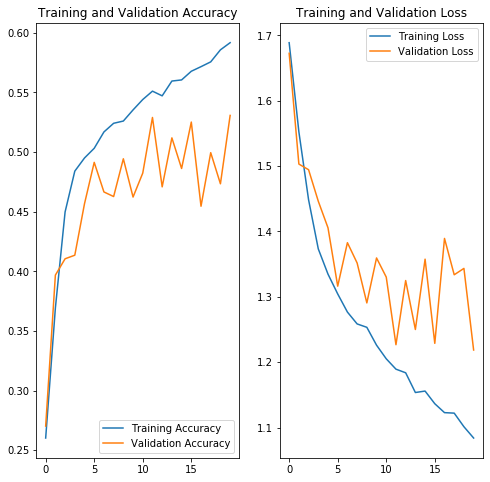

In [78]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [79]:
model6 = keras.models.Sequential()
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(300, activation ="relu"))
model6.add(keras.layers.Dense(300, activation ="relu"))
model6.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model6.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#X_train = X_train.astype('float32')/255.0
#y_train = y_train.astype('uint')
#X_val = X_val.astype('float32')/255.0
#y_val = y_val.astype('uint')

history = model6.fit(X_train, y_train, batch_size=128, epochs=40, validation_data =(X_val,y_val))


Train on 11695 samples, validate on 2339 samples
Epoch 1/40
11695/11695 [==============================] - 7s 630us/sample - loss: 1.5514 - acc: 0.3883 - val_loss: 1.5250 - val_acc: 0.3852
Epoch 2/40
11695/11695 [==============================] - 6s 555us/sample - loss: 1.3426 - acc: 0.4772 - val_loss: 1.7298 - val_acc: 0.3647
Epoch 3/40
11695/11695 [==============================] - 7s 583us/sample - loss: 1.2701 - acc: 0.5103 - val_loss: 1.2552 - val_acc: 0.5195
Epoch 4/40
11695/11695 [==============================] - 7s 573us/sample - loss: 1.2210 - acc: 0.5310 - val_loss: 1.2489 - val_acc: 0.5216
Epoch 5/40
11695/11695 [==============================] - 7s 572us/sample - loss: 1.1763 - acc: 0.5483 - val_loss: 1.5620 - val_acc: 0.4357
Epoch 6/40
11695/11695 [==============================] - 6s 549us/sample - loss: 1.1504 - acc: 0.5617 - val_loss: 1.1876 - val_acc: 0.5417
Epoch 7/40
11695/11695 [==============================] - 7s 559us/sample - loss: 1.1153 - acc: 0.5770 - val_lo

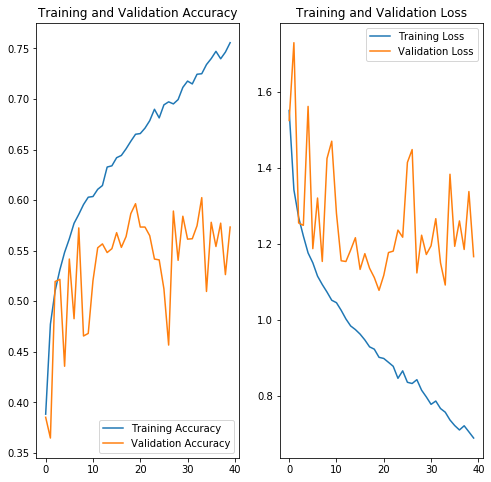

In [80]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
X_test = X_test.astype('float32')/255.0

loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.158


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_proba = model1.predict(X_test) 
y_pred = model1.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))


Confusion Matrix
[[185  26  23  37  63  47]
 [ 10 320   3   8  21  18]
 [ 45   4 387  70 158  27]
 [ 75  17 103 385 126  22]
 [ 21  15   9  16 106   8]
 [101  92  28   9  36 379]]
Classification Report
              precision    recall  f1-score   support

           0       0.42      0.49      0.45       381
           1       0.68      0.84      0.75       380
           2       0.70      0.56      0.62       691
           3       0.73      0.53      0.61       728
           4       0.21      0.61      0.31       175
           5       0.76      0.59      0.66       645

    accuracy                           0.59      3000
   macro avg       0.58      0.60      0.57      3000
weighted avg       0.65      0.59      0.61      3000



In [38]:
loss, acc = model6.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

y_proba = model6.predict(X_test) 
y_pred = model6.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))

Accuracy: 0.551
Confusion Matrix
[[300  79  65  55  93 167]
 [  9 317   1   2  12  22]
 [  1   0 131  16  16   6]
 [ 52  17 119 366  87  23]
 [ 50  31 230  84 296  41]
 [ 25  30   7   2   6 242]]
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.40      0.50       759
           1       0.67      0.87      0.76       363
           2       0.24      0.77      0.36       170
           3       0.70      0.55      0.62       664
           4       0.58      0.40      0.48       732
           5       0.48      0.78      0.60       312

    accuracy                           0.55      3000
   macro avg       0.56      0.63      0.55      3000
weighted avg       0.61      0.55      0.55      3000



In [82]:
model1_r = keras.models.Sequential()
model1_r.add(keras.layers.Flatten())
model1_r.add(keras.layers.Dense(300, activation ="relu",kernel_regularizer=keras.regularizers.l2(0.01)))
model1_r.add(keras.layers.Dense(300, activation ="relu",kernel_regularizer=keras.regularizers.l2(0.01)))
model1_r.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model1_r.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#X_train = X_train.astype('float32')/255.0
#y_train = y_train.astype('uint')
#X_val = X_val.astype('float32')/255.0
#y_val = y_val.astype('uint')

history = model1_r.fit(X_train, y_train, batch_size=128, epochs=20, validation_data =(X_val,y_val))

Train on 11695 samples, validate on 2339 samples
Epoch 1/20
11695/11695 [==============================] - 12s 1ms/sample - loss: 10.3437 - acc: 0.3685 - val_loss: 10.0456 - val_acc: 0.4468
Epoch 2/20
11695/11695 [==============================] - 11s 936us/sample - loss: 9.8037 - acc: 0.4782 - val_loss: 9.7518 - val_acc: 0.4382
Epoch 3/20
11695/11695 [==============================] - 11s 957us/sample - loss: 9.4287 - acc: 0.5091 - val_loss: 9.4026 - val_acc: 0.4425
Epoch 4/20
11695/11695 [==============================] - 11s 951us/sample - loss: 9.0817 - acc: 0.5354 - val_loss: 9.2029 - val_acc: 0.4096
Epoch 5/20
11695/11695 [==============================] - 11s 952us/sample - loss: 8.7730 - acc: 0.5419 - val_loss: 8.7255 - val_acc: 0.5135
Epoch 6/20
11695/11695 [==============================] - 11s 978us/sample - loss: 8.4695 - acc: 0.5607 - val_loss: 8.4248 - val_acc: 0.5297
Epoch 7/20
11695/11695 [==============================] - 12s 992us/sample - loss: 8.1930 - acc: 0.5665 -

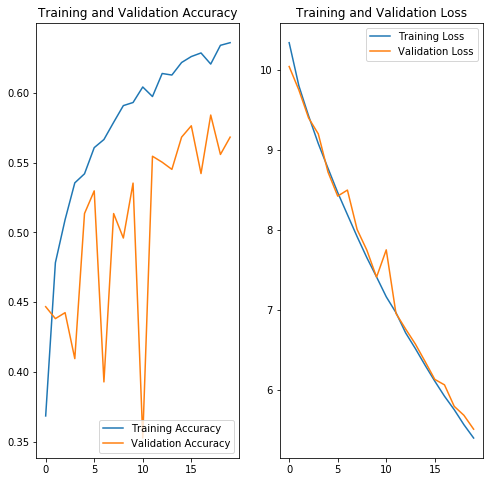

In [83]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
loss, acc = model1_r.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

y_proba = model1_r.predict(X_test) 
y_pred = model1_r.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))

Accuracy: 0.158
Confusion Matrix
[[  0   0   0   0   0   0]
 [437 474 553 525 510 501]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.16      0.27      3000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.16      3000
   macro avg       0.17      0.03      0.05      3000
weighted avg       1.00      0.16      0.27      3000



C:\Users\rahul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [84]:
model6_r = keras.models.Sequential()
model6_r.add(keras.layers.Flatten())
model6_r.add(keras.layers.Dense(300, activation ="relu",kernel_regularizer=keras.regularizers.l2(0.01)))
model6_r.add(keras.layers.Dense(300, activation ="relu",kernel_regularizer=keras.regularizers.l2(0.01)))
model6_r.add(keras.layers.Dense(6, activation = "softmax"))


sgd = SGD(learning_rate=0.01)
model6_r.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model6_r.fit(X_train, y_train, batch_size=128, epochs=40, validation_data =(X_val,y_val))

Train on 11695 samples, validate on 2339 samples
Epoch 1/40
11695/11695 [==============================] - 12s 1ms/sample - loss: 10.3533 - acc: 0.3756 - val_loss: 10.0740 - val_acc: 0.4173
Epoch 2/40
11695/11695 [==============================] - 11s 939us/sample - loss: 9.8060 - acc: 0.4864 - val_loss: 9.7427 - val_acc: 0.4100
Epoch 3/40
11695/11695 [==============================] - 10s 892us/sample - loss: 9.4357 - acc: 0.5098 - val_loss: 9.3917 - val_acc: 0.4716
Epoch 4/40
11695/11695 [==============================] - 11s 902us/sample - loss: 9.0988 - acc: 0.5287 - val_loss: 9.0203 - val_acc: 0.4878
Epoch 5/40
11695/11695 [==============================] - 12s 997us/sample - loss: 8.7878 - acc: 0.5404 - val_loss: 8.7880 - val_acc: 0.4942
Epoch 6/40
11695/11695 [==============================] - 11s 954us/sample - loss: 8.4933 - acc: 0.5556 - val_loss: 8.3995 - val_acc: 0.5468
Epoch 7/40
11695/11695 [==============================] - 12s 1ms/sample - loss: 8.1937 - acc: 0.5718 - v

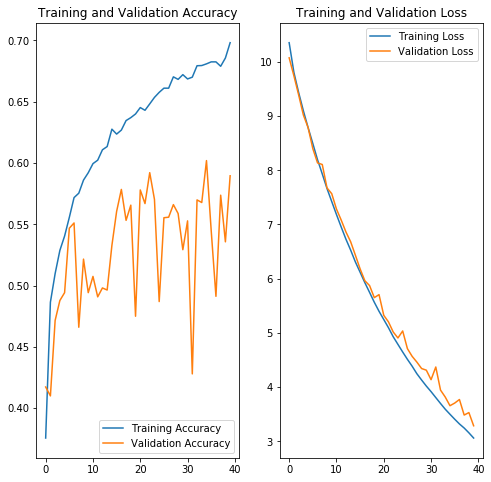

In [85]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
loss, acc = model6_r.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

y_proba = model6_r.predict(X_test) 
y_pred = model6_r.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))

Accuracy: 0.525
Confusion Matrix
[[361  85 195 202 307 155]
 [ 11 331   5   8  22  25]
 [  7   3 291  45  91   9]
 [ 13   3  45 263  45   5]
 [  2   0   2   2  23   0]
 [ 43  52  15   5  22 307]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.28      0.41      1305
           1       0.70      0.82      0.76       402
           2       0.53      0.65      0.58       446
           3       0.50      0.70      0.59       374
           4       0.05      0.79      0.09        29
           5       0.61      0.69      0.65       444

    accuracy                           0.53      3000
   macro avg       0.53      0.66      0.51      3000
weighted avg       0.68      0.53      0.54      3000

